In [ ]:
#Importing the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
#Data Analysis
#Loading the dataset into pandas df
diabetes_data = pd.read_csv('/content/diabetes_dataset_from_kaggle.csv')

In [ ]:
#Loading the first 5 rows of the df
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Checking if there are any missing values
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#More info about the data
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Checking the no. of outcomes
# 1 --> Diabetic
# 0 --> Non Diabetic
diabetes_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

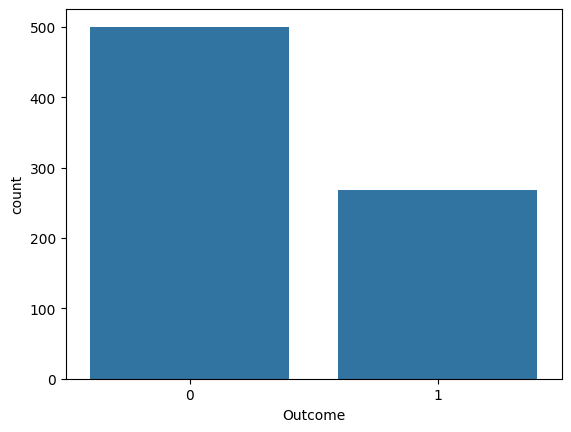

In [ ]:
#Visualizing using the countplot
sns.countplot(x='Outcome', data=diabetes_data)

In [ ]:
#The outcomes or dataset are imbalanced

In [ ]:
#Visualizing the dataset using sns heatmap
#Correlation matrix
correlation = diabetes_data.corr()

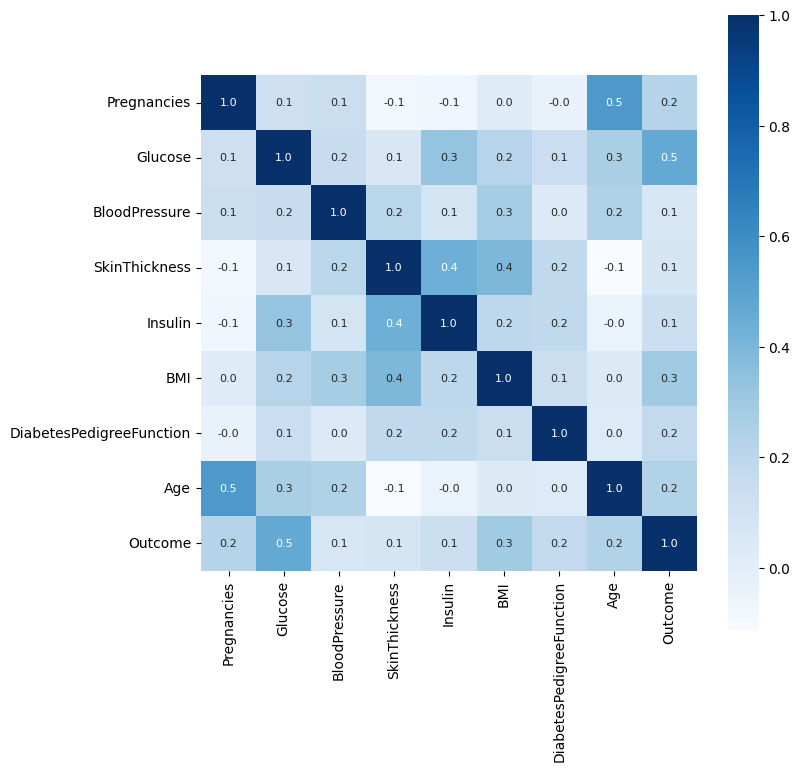

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()

In [ ]:
#The glucose has the highest correlation and some features are has a low correlation to the outcome.
#But even though they have low correlations to the outcome this doesnt mean that they have to be drop or not helpful
#to the model predictions.
#And there are no negative correlations based on the figure

In [ ]:
#Descriptive analysis
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#It seems there are skewness in the dataset

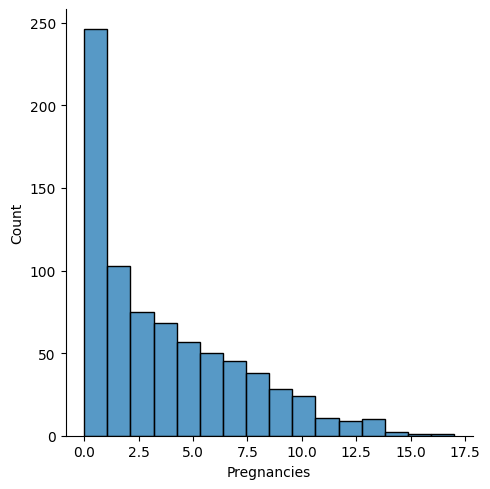

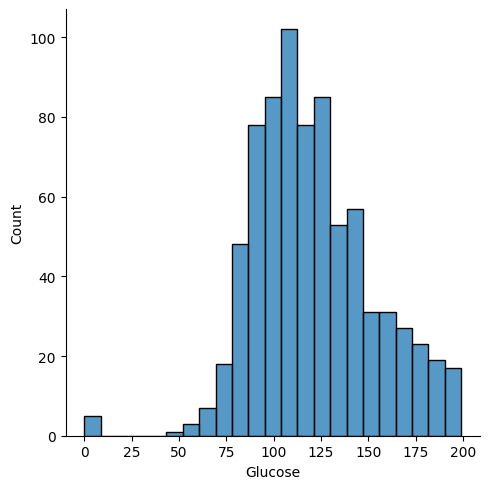

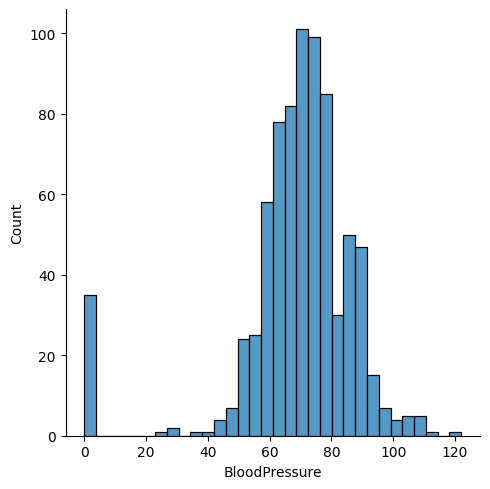

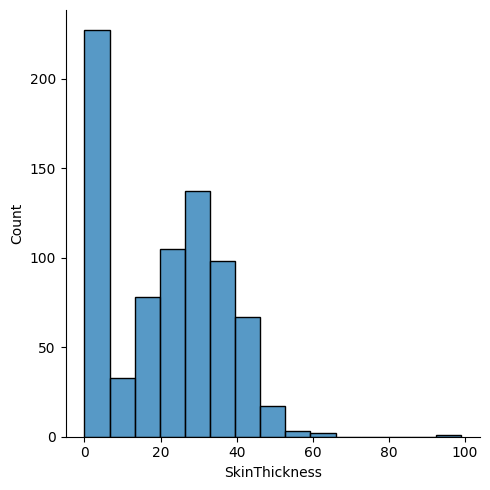

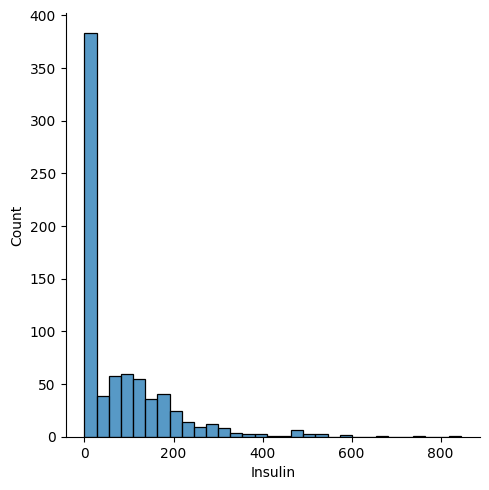

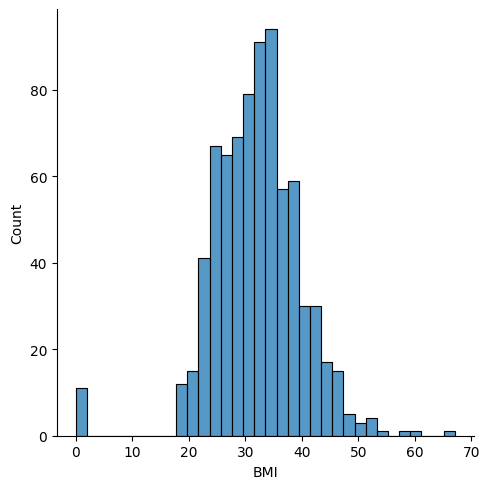

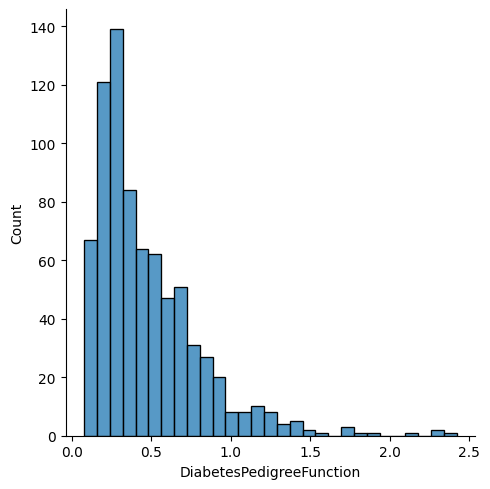

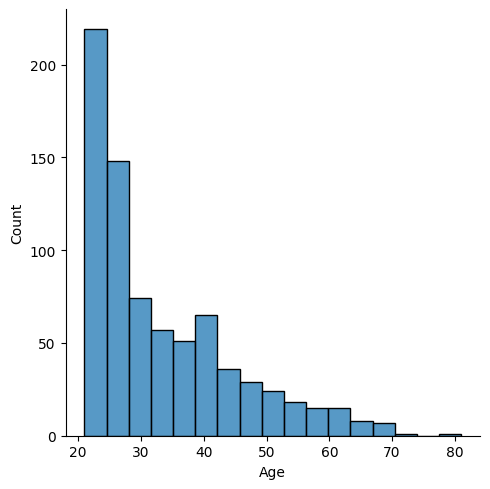

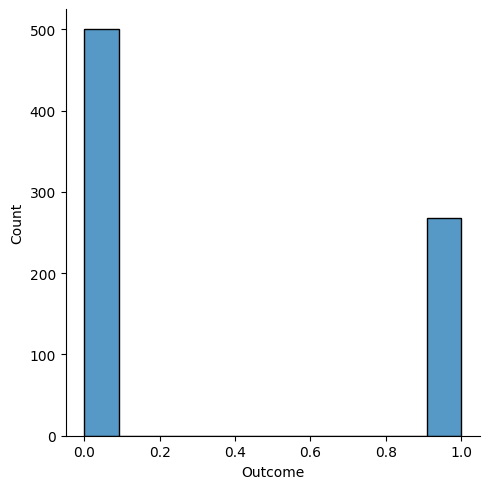

In [ ]:
#Visualizing the distributions of each feature
for column in diabetes_data:
  sns.displot(x=column, data=diabetes_data)

In [ ]:
#The distributions in each feature have skewness and some of them have noticeable outliers

In [ ]:
#Mean values in each features by outcomes
diabetes_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
#It can be seen that diabetic values are higher than the non-diabetic values.

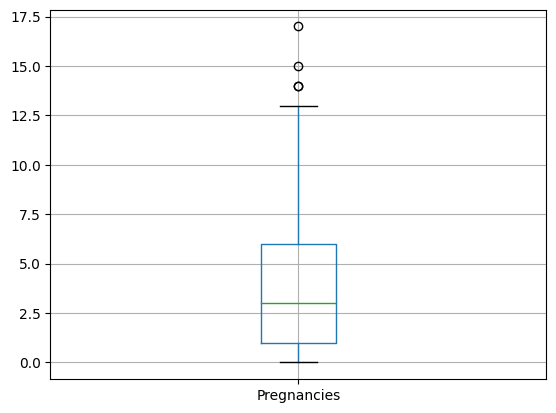

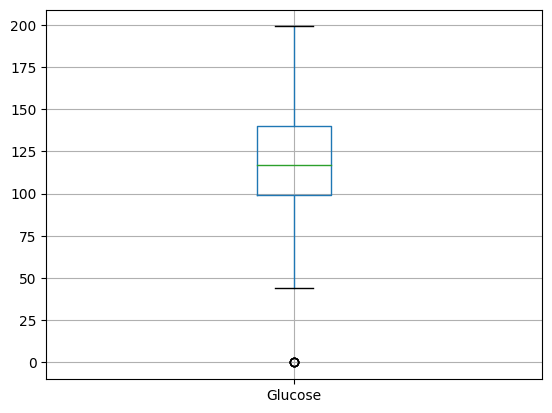

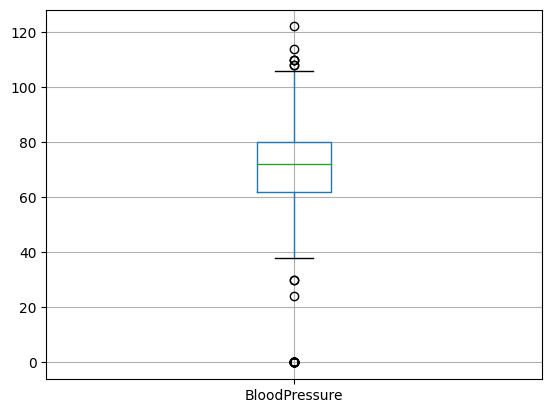

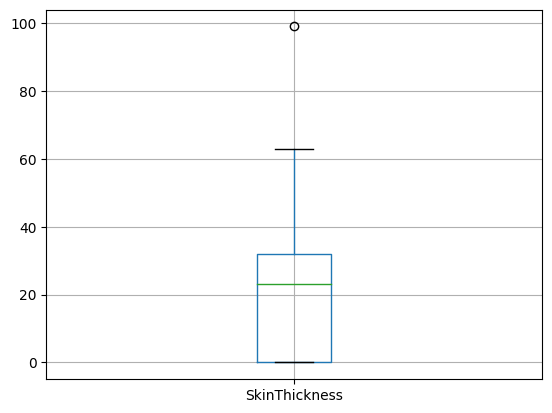

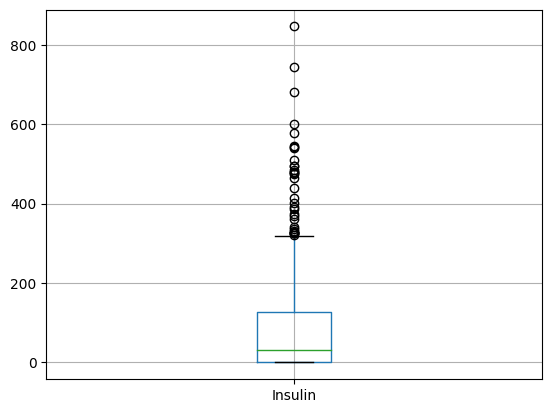

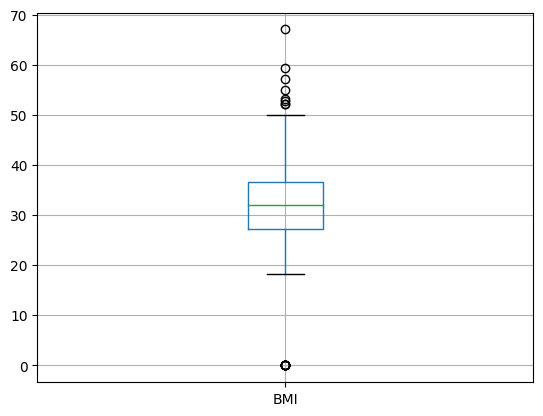

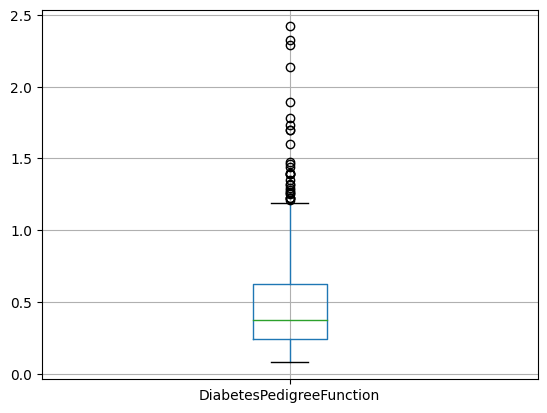

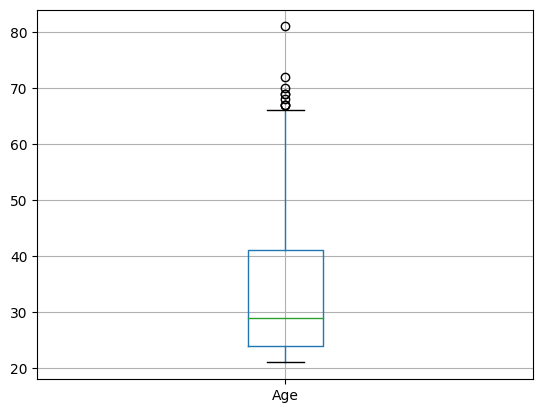

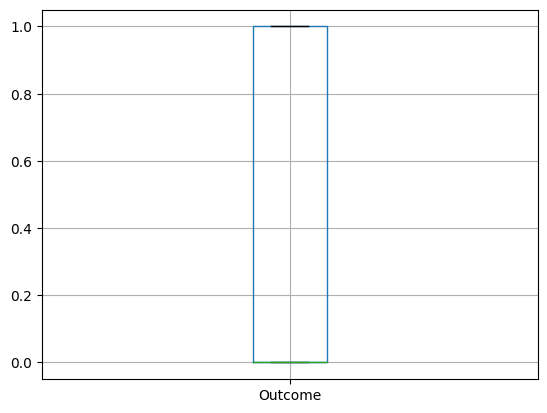

In [ ]:
#Outlier detection
for column in diabetes_data:
  plt.figure()
  diabetes_data.boxplot([column])

In [ ]:
#Based on the boxplot there are outliers in the features but not all outliers are really may seems human error
#or not helpful in our classification. But in the regression models that are sensitive to the outliers
#it needs to be take action.

In [192]:
#EDA and visualization summary:
#   There are no missing values in the dataset
#   The dataset is imbalanced
#   No negative and closer to 1.0 correlations based on the correlation matrix
#   The features are skewed and have outlierrs

In [ ]:
#Splitting the features from the label
X = diabetes_data.drop(columns='Outcome', axis=1) #dropping the label column to get the features
Y = diabetes_data['Outcome']

In [ ]:
#Converting the X and Y to np array for faster calculations and more data manipulations
X = np.asarray(X)
Y = np.asarray(Y)

In [ ]:
#Standardizing the X for faster the convergence of the model
#Using the standard scaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
X_std.std()

1.0

In [ ]:
#Splitting the data into the training and test dataset using train test split
x_train, x_test, y_train, y_test = train_test_split(X_std, Y, test_size=0.2, random_state=2, stratify=Y)

In [ ]:
#Checking the train and test set values or shape
print(X_std.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(768, 8) (614, 8) (154, 8) (614,) (154,)


In [ ]:
#fitting the data using the 4 algorithms
lr_model = LogisticRegression()
sv_model = SVC(kernel='linear')
kn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier()


In [ ]:
#Model training
lr_model.fit(x_train, y_train)
sv_model.fit(x_train, y_train)
kn_model.fit(x_train, y_train)
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
#Model evaluation
#Prediction and accuracies of the training and test data
predict_lr_train = lr_model.predict(x_train)
predict_lr_test = lr_model.predict(x_test)

predict_sv_train = sv_model.predict(x_train)
predict_sv_test = sv_model.predict(x_test)

predict_kn_train = kn_model.predict(x_train)
predict_kn_test = kn_model.predict(x_test)

predict_rf_train = rf_model.predict(x_train)
predict_rf_test = rf_model.predict(x_test)

In [ ]:
#Accuracy Scores
accuracy_lr_train = accuracy_score(predict_lr_train, y_train)
accuracy_lr_test = accuracy_score(predict_lr_test, y_test)

accuracy_sv_train = accuracy_score(predict_sv_train, y_train)
accuracy_sv_test = accuracy_score(predict_sv_test, y_test)

accuracy_kn_train = accuracy_score(predict_kn_train, y_train)
accuracy_kn_test = accuracy_score(predict_kn_test, y_test)

accuracy_rf_train = accuracy_score(predict_rf_train, y_train)
accuracy_rf_test = accuracy_score(predict_rf_test, y_test)

In [ ]:
#Printing the accuracy scores of the models
print('The Accuracy Scores of the Logistic Regression: ')
print('Train: ', accuracy_lr_train)
print('Test: ', accuracy_lr_test)
print('-----------------------------------------------------')
print('The Accuracy Scores of the Support Vector Classifier: ')
print('Train: ', accuracy_sv_train)
print('Test: ', accuracy_sv_test)
print('-----------------------------------------------------')
print('The Accuracy Scores of the KNearest Neighbors Classifier: ')
print('Train: ', accuracy_kn_train)
print('Test: ', accuracy_kn_test)
print('-----------------------------------------------------')
print('The Accuracy Scores of the Random Forest Classifier: ')
print('Train: ', accuracy_rf_train)
print('Test: ', accuracy_rf_test)
print('-----------------------------------------------------')

The Accuracy Scores of the Logistic Regression: 
Train:  0.7850162866449512
Test:  0.7597402597402597
-----------------------------------------------------
The Accuracy Scores of the Support Vector Classifier: 
Train:  0.7866449511400652
Test:  0.7727272727272727
-----------------------------------------------------
The Accuracy Scores of the KNearest Neighbors Classifier: 
Train:  0.8289902280130294
Test:  0.7207792207792207
-----------------------------------------------------
The Accuracy Scores of the Random Forest Classifier: 
Train:  1.0
Test:  0.7337662337662337
-----------------------------------------------------


In [ ]:
#Training data highest accuracy: Random Forest Classifier
#Test data highest accuracy: Support Vector Classifier

In [ ]:
#Even though accuracy score is a common metrics for the classification model. I remember that it is not a reliable metrics
#if our dataset is imbalanced. So, in this case the diabetes dataset is imbalanced.

In [ ]:
#I will use the cross validation technique to check the generalization of the 4 models.
#And also to choose which will be the best model for our problem or dataset.

In [ ]:
#Cross Validation
cv_score_lr = cross_val_score(lr_model, X_std, Y, cv=5)
cv_score_sv = cross_val_score(sv_model, X_std, Y, cv=5)
cv_score_kn = cross_val_score(kn_model, X_std, Y, cv=5)
cv_score_rf = cross_val_score(rf_model, X_std, Y, cv=5)

In [ ]:
#Cross validation score into its mean score
mean_score_lr = sum(cv_score_lr)/len(cv_score_lr)
mean_score_lr = mean_score_lr * 100
mean_score_lr = round(mean_score_lr, 2)

mean_score_sv = sum(cv_score_sv)/len(cv_score_sv)
mean_score_sv = mean_score_sv * 100
mean_score_sv = round(mean_score_sv, 2)

mean_score_kn = sum(cv_score_kn)/len(cv_score_kn)
mean_score_kn = mean_score_kn * 100
mean_score_kn = round(mean_score_kn, 2)

mean_score_rf = sum(cv_score_rf)/len(cv_score_rf)
mean_score_rf = mean_score_rf * 100
mean_score_rf = round(mean_score_rf, 2)

In [ ]:
#Cross validation scores of the models
print('Logistic Regression cv score: ', cv_score_lr)
print('Logistic Regression cv mean score: ', mean_score_lr)
print('-------------------------------------------------------')
print('Support Vector Classifier cv score: ', cv_score_sv)
print('Support Vector Classifier cv mean score: ', mean_score_sv)
print('-------------------------------------------------------')
print('KNearest Neighbors Classifier cv score: ', cv_score_kn)
print('KNearest Neighbors Classifier cv mean score: ', mean_score_kn)
print('-------------------------------------------------------')
print('Random Forest Classifier cv score: ', cv_score_rf)
print('Random Forest Classifier cv mean score: ', mean_score_rf)
print('-------------------------------------------------------')

Logistic Regression cv score:  [0.77272727 0.74675325 0.75324675 0.81699346 0.76470588]
Logistic Regression cv mean score:  77.09
-------------------------------------------------------
Support Vector Classifier cv score:  [0.76623377 0.75974026 0.75974026 0.81699346 0.76470588]
Support Vector Classifier cv mean score:  77.35
-------------------------------------------------------
KNearest Neighbors Classifier cv score:  [0.72077922 0.73376623 0.71428571 0.77124183 0.7254902 ]
KNearest Neighbors Classifier cv mean score:  73.31
-------------------------------------------------------
Random Forest Classifier cv score:  [0.74025974 0.72727273 0.76623377 0.83006536 0.75816993]
Random Forest Classifier cv mean score:  76.44
-------------------------------------------------------


In [ ]:
#Highest cross validation score: Support Vector Classifier

In [ ]:
#Now, I will choose the support vector classifier algorithm to find what is the optimum hyperparameters
#for it and to see what will be the performance of the model if the hyperparameters are tuned.

In [ ]:
#Hyperparameters tuning - SVC
hyperparameters = {
                    'kernel':[
                        'linear', 'poly', 'rbf', 'sigmoid'
                    ],
                    'C':[
                        1,5,10,15,20
                    ]
}

In [ ]:
#I will use the grid search algorithm to find the optimum hyperparameters for the SVC model
classifier = GridSearchCV(sv_model, hyperparameters, cv=5)

In [ ]:
classifier.fit(X_std, Y)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10, 15, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
#Grid search results
classifier.cv_results_

{'mean_fit_time': array([0.01443863, 0.01134224, 0.01096535, 0.01424046, 0.0367146 ,
        0.019138  , 0.01288409, 0.0117816 , 0.04485841, 0.03074636,
        0.01485133, 0.01188393, 0.06392326, 0.03548522, 0.01767235,
        0.01164989, 0.07545733, 0.04718308, 0.02060637, 0.01135015]),
 'std_fit_time': array([0.00262386, 0.00060974, 0.00029241, 0.00070292, 0.00616473,
        0.00162315, 0.00022589, 0.00059785, 0.0051855 , 0.00497738,
        0.00040487, 0.00127804, 0.00554516, 0.00561439, 0.00181761,
        0.00029686, 0.00941845, 0.01009643, 0.00248948, 0.00050277]),
 'mean_score_time': array([0.00205226, 0.00248976, 0.00374904, 0.00340295, 0.00216856,
        0.00216417, 0.00356569, 0.00279355, 0.00242248, 0.00208569,
        0.00356441, 0.00272245, 0.00232501, 0.0022624 , 0.00361304,
        0.00302291, 0.00217409, 0.00218282, 0.00374517, 0.00268593]),
 'std_score_time': array([9.30090893e-05, 7.61947171e-04, 1.06242015e-04, 8.37490863e-05,
        5.31243677e-05, 9.42664249e-

In [ ]:
#Loading the results into pandas df
results_df = pd.DataFrame(classifier.cv_results_)

In [ ]:
results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014439,0.002624,0.002052,0.000093,1,linear,"{'C': 1, 'kernel': 'linear'}",0.766234,0.759740,0.759740,0.816993,0.764706,0.773483,0.021911,2
1,0.011342,0.000610,0.002490,0.000762,1,poly,"{'C': 1, 'kernel': 'poly'}",0.740260,0.772727,0.720779,0.764706,0.745098,0.748714,0.018424,11
2,0.010965,0.000292,0.003749,0.000106,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.766234,0.753247,0.746753,0.810458,0.777778,0.770894,0.022488,8
3,0.014240,0.000703,0.003403,0.000084,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.681818,0.701299,0.707792,0.718954,0.725490,0.707071,0.015179,16
4,0.036715,0.006165,0.002169,0.000053,5,linear,"{'C': 5, 'kernel': 'linear'}",0.766234,0.759740,0.759740,0.816993,0.764706,0.773483,0.021911,2


In [ ]:
#Loading the results for the C, Kernel and mean test score
grid_search_df = results_df[['param_C', 'param_kernel', 'mean_test_score']]

In [ ]:
#pandas df of 20 rows
grid_search_df.head(n=20)

,param_C,param_kernel,mean_test_score
0,1,linear,0.773483
1,1,poly,0.748714
2,1,rbf,0.770894
3,1,sigmoid,0.707071
4,5,linear,0.773483
5,5,poly,0.759138
6,5,rbf,0.777455
7,5,sigmoid,0.692743
8,10,linear,0.773483
9,10,poly,0.742212


In [ ]:
#The best hyperparameters for the SVC
classifier.best_params_

{'C': 5, 'kernel': 'rbf'}

In [ ]:
#The highest test score for the SVC
classifier.best_score_

0.777455224514048

In [ ]:
#Based on the results of the best params, best score and data frame cv results, the best parameters and score for the SVC are
#C:5 and kernel:rbf
#77.74%

In [ ]:
#Now, I will train the SVC model using these parameters to see if our model is performing better

In [ ]:
best_model = SVC(kernel='rbf', C=5)

In [ ]:
best_model.fit(x_train, y_train)

SVC(C=5)

In [ ]:
#Prediction and accuracy score of the tuned svc model
prediction_best_train = best_model.predict(x_train)
prediction_best_test = best_model.predict(x_test)

accuracy_best_train = accuracy_score(prediction_best_train, y_train)
accuracy_best_test = accuracy_score(prediction_best_test, y_test)

In [ ]:
print('New - Training Data: ', accuracy_best_train)
print('New - Test Data: ', accuracy_best_test)

New - Training Data:  0.8680781758957655
New - Test Data:  0.7142857142857143


In [ ]:
#Old accuracy score result of the svc model
print('Old - Training Data: ', accuracy_sv_train)
print('Old - Test Data: ', accuracy_sv_test)

Old - Training Data:  0.7866449511400652
Old - Test Data:  0.7727272727272727


In [ ]:
#Based on the results the new model is overfitting
#Highest Train Score: New SVC model
#Highest Test Score: Old SVC model

In [ ]:
#Now, I will test the new model again in cross validation for its generalization
new_cv_score = cross_val_score(best_model, X_std, Y, cv=5)

In [ ]:
new_mean_score = sum(new_cv_score)/len(new_cv_score)
new_mean_score = new_mean_score * 100
new_mean_scoe = round(new_mean_score, 2)

In [ ]:
#Cv score and the mean of cv score of the new svc model
print('New SVC Model - CV Score: ', new_cv_score)
print('New SVC Model - Mean Score: ', new_mean_score)

New SVC Model - CV Score:  [0.74675325 0.75324675 0.74675325 0.83006536 0.81045752]
New SVC Model - Mean Score:  77.74552245140481


In [ ]:
#Old cv and mean score of the svc model
print('Old - Support Vector Classifier cv score: ', cv_score_sv)
print('Old - Support Vector Classifier cv mean score: ', mean_score_sv)

Old - Support Vector Classifier cv score:  [0.76623377 0.75974026 0.75974026 0.81699346 0.76470588]
Old - Support Vector Classifier cv mean score:  77.35


In [ ]:
#Based on the results the new cv score of the new svc model is higher but not much

In [ ]:
#I will test the new svc model again using the confusion matrix metrics
cm_train = confusion_matrix(prediction_best_train, y_train)
cm_test = confusion_matrix(prediction_best_test, y_test)

In [ ]:
print(cm_train)
print(cm_test)

[[376  57]
 [ 24 157]]
[[86 30]
 [14 24]]


<Axes: >

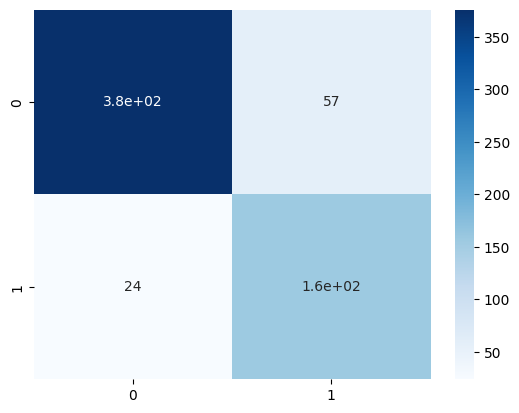

In [ ]:
#Visualizing the confusion matrix
sns.heatmap(cm_train, cmap='Blues', annot=True)

<Axes: >

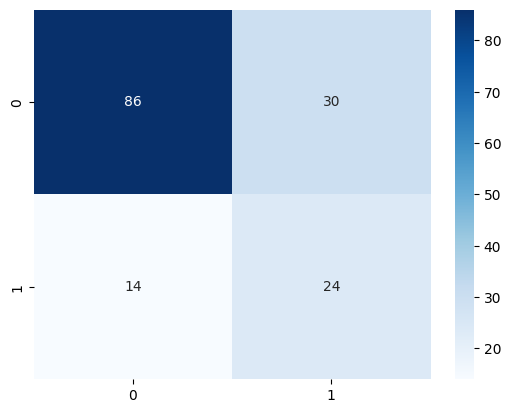

In [ ]:
sns.heatmap(cm_test, cmap='Blues', annot=True)

In [ ]:
#Based on the confusion matrix, the new svc model has a higher false positive than the false negative

In [ ]:
#I will test the model again using the f1 score, the harmonic mean of the precision and recall scores
f1_train = f1_score(prediction_best_train, y_train)
f1_test = f1_score(prediction_best_test, y_test)

In [ ]:
print(f1_train)
print(f1_test)

0.7949367088607595
0.5217391304347826


In [ ]:
#We can see that the new svc model is better at performing in the training data while lower on the testing data
#The model is experiencing overfitting

In [ ]:
#It seems that even though it is the best hyperparameters with the given parameters, it is not performing well.

In [ ]:
#Now, I will train a model again. Based on my observation in the grid search results, it has a potential
#for performing better predictions or not

In [ ]:
#Training SVC - Kernel: Linear - C: 1
linear_svc = SVC(kernel='linear', C=1)

In [ ]:
linear_svc.fit(x_train, y_train)

SVC(C=1, kernel='linear')

In [ ]:
#Now, I will test it with the accuracy score

In [ ]:
linear_prediction_train = linear_svc.predict(x_train)
linear_prediction_test = linear_svc.predict(x_test)

In [ ]:
linear_accuracy_train = accuracy_score(linear_prediction_train, y_train)
linear_accuracy_test = accuracy_score(linear_prediction_test, y_test)

In [ ]:
print('Accuracy Score - linear train: ', linear_accuracy_train)
print('Accuracy Score - linear test: ', linear_accuracy_test)

Accuracy Score - linear train:  0.7866449511400652
Accuracy Score - linear test:  0.7727272727272727


In [ ]:
#Comparing it to the other accuracy scores
print(accuracy_sv_train)
print(accuracy_sv_test)
print('----------')
print(accuracy_best_train)
print(accuracy_best_test)

0.7866449511400652
0.7727272727272727
----------
0.8680781758957655
0.7142857142857143


In [ ]:
#Even though the 'linear' svc model has a lower accuracy score than the 2 but it is also the highest test accuracy score
#And based on the accuracy score, it seems the model is not overfitting but I will test it again on the cv score

In [ ]:
#Cross validation score of the 'linear' svc model
linear_cv_score = cross_val_score(linear_svc, X_std, Y, cv=5)

In [ ]:
linear_mean_score = sum(linear_cv_score)/len(linear_cv_score)
linear_mean_score = linear_mean_score * 100
linear_mean_score = round(linear_mean_score, 2)

In [ ]:
#The cv and cv mean score
print('CV Score: ', linear_cv_score)
print('Mean CV Score: ', linear_mean_score)

CV Score:  [0.76623377 0.75974026 0.75974026 0.81699346 0.76470588]
Mean CV Score:  77.35


In [ ]:
#Comparing to the 2 old models
print(cv_score_sv)
print(mean_score_sv)
print('--------------')
print(new_cv_score)
print(new_mean_score)

[0.76623377 0.75974026 0.75974026 0.81699346 0.76470588]
77.35
--------------
[0.74675325 0.75324675 0.74675325 0.83006536 0.81045752]
77.74552245140481


In [ ]:
#It has the same cv and mean cv score of the 1st model

In [ ]:
#Testing now using the f1 score
#linear model
f1_linear_train = f1_score(linear_prediction_train, y_train)
f1_linear_test = f1_score(linear_prediction_test, y_test)

#1st model
f1_first_train = f1_score(predict_sv_train, y_train)
f1_first_test = f1_score(predict_sv_test, y_test)

In [ ]:
#The results of the f1 scores of 3 svc trained models
print('F1 First Train: ', f1_first_train)
print('F1 First Test: ', f1_first_test)
print('---------------------------------------')
print('F1 Best Train: ', f1_train)
print('F1 Best Test: ', f1_test)
print('---------------------------------------')
print('F1 Linear Train: ', f1_linear_train)
print('F1 Linear Test: ', f1_linear_test)

F1 First Train:  0.6579634464751958
F1 First Test:  0.6153846153846154
---------------------------------------
F1 Best Train:  0.7949367088607595
F1 Best Test:  0.5217391304347826
---------------------------------------
F1 Linear Train:  0.6579634464751958
F1 Linear Test:  0.6153846153846154


In [ ]:
#The linear model has the same results as the 1st model 'rbf'

In [ ]:
#Conclusion:
#   It seems that the svc model has reached its maximum potential on a imbalanced dataset
#   Other solutions seems is to penalize or apply regularization and gradient descent techniques in the models
#   Other solutions is to have more data and also to solve the imbalanced dataset
#   After that, select a few more classification models based on the problem, data, and the expected outcome

In [ ]:
#Note:
#   I am a beginner learner in machine learning, can you please give me an insights and opinions based on this?
#   Thank you very much. I hope all of you has benefit to this project.